<a href="https://colab.research.google.com/github/Ajay0110/NYC-Taxi-Trip-Time-Prediction/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

### Importing libraries

In [134]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
import statsmodels.formula.api as sm
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

### Connecting Google Drive

In [135]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Setting up path to the csv file

In [136]:
# Setting up path
taxi_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EDA/Regression EDA Capstone Project/NYC Taxi Data.csv")

### Checking the shape of the dataset

In [137]:
taxi_df.shape # To check the shape

(1458644, 11)

### As we can see there are 1458644 rows and 11 columns.

### Dataframe's Head and Tail

In [138]:
taxi_df.head() # To get the first 5 rows

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [139]:
taxi_df.tail() # To get the last 5 rows

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


### Checking for null values

In [140]:
taxi_df.isnull().sum() # Sum of null values

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

### As we can see there are no null or NaN values. Now checking for datatypes.

In [141]:
taxi_df.info() # df.info() is to check non-null count as well as datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


We have 3 variables of object type namely pickup_datetime,dropoff_datetime and store_and_fwd_flag.

Converting pickup and dropoff from object to datetime datatype

In [142]:
# Converting object datatype to datetime
taxi_df['pickup_datetime'] = pd.to_datetime(taxi_df['pickup_datetime'])
taxi_df['dropoff_datetime'] = pd.to_datetime(taxi_df['dropoff_datetime'])
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


### From datetime variables we will be able to derive whether the pickup and drop was done in the morning, afternoon, evening and at night. For that we need to derive hour and classify them accordingly. 

In [143]:
# Creating new variables picked_up_hour and dropped_hour under taxi_df dataframe
taxi_df['picked_up_hour']=taxi_df.pickup_datetime.dt.hour
taxi_df['dropped_hour'] = taxi_df.dropoff_datetime.dt.hour
taxi_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,picked_up_hour,dropped_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11,12
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13,13


### As we can see the hours are in 24hr format. Creating a function to classify them.

In [144]:
# Function to convert hour into time of the day like Morning, Afternoon, Evening and Night.
def times_of_the_day(hr):
  if hr in range(6,12):
    return 'Morning'
  elif hr in range(12,16):
    return 'Afternoon'
  elif hr in range(16,20):
    return 'Evening'
  else:
    return 'Night'

In [145]:
# Using apply method to call times of the day function for the datetime variables
taxi_df['pickup_tod'] = taxi_df['picked_up_hour'].apply(times_of_the_day)
taxi_df['drop_tod'] = taxi_df['dropped_hour'].apply(times_of_the_day)
taxi_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,picked_up_hour,dropped_hour,pickup_tod,drop_tod
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17,17,Evening,Evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,0,Night,Night
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11,12,Morning,Afternoon
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19,19,Evening,Evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13,13,Afternoon,Afternoon


### We can get the name of the day and month as well as year.

In [146]:
# Creating new variables under taxi_df dataframe same as above
taxi_df['picked_up_day']=taxi_df.pickup_datetime.dt.day_name()
taxi_df['dropped_day']=taxi_df.dropoff_datetime.dt.day_name()
taxi_df['month']=taxi_df.pickup_datetime.dt.month_name()
taxi_df['year']=taxi_df.pickup_datetime.dt.year
taxi_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,picked_up_hour,dropped_hour,pickup_tod,drop_tod,picked_up_day,dropped_day,month,year
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17,17,Evening,Evening,Monday,Monday,March,2016
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,0,Night,Night,Sunday,Sunday,June,2016
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11,12,Morning,Afternoon,Tuesday,Tuesday,January,2016
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19,19,Evening,Evening,Wednesday,Wednesday,April,2016
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13,13,Afternoon,Afternoon,Saturday,Saturday,March,2016


By importing great_circle from geopy.distance we can calculate distance using co-ordinates

In [147]:
# Importing great_circle from geopy_distance
from geopy.distance import great_circle
# Function that takes coordinates i.e, latitudes and longitudes to calculate distance
def dist_calc(lat1,long1,lat2,long2):
  pickup = (lat1,long1)
  drop = (lat2,long2)
  return great_circle(pickup,drop).km

# Creating distance variable 
taxi_df['distance'] = taxi_df.apply(lambda x: dist_calc(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)


In [148]:
taxi_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,picked_up_hour,dropped_hour,pickup_tod,drop_tod,picked_up_day,dropped_day,month,year,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17,17,Evening,Evening,Monday,Monday,March,2016,1.498523
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,0,Night,Night,Sunday,Sunday,June,2016,1.805510
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11,12,Morning,Afternoon,Tuesday,Tuesday,January,2016,6.385108
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19,19,Evening,Evening,Wednesday,Wednesday,April,2016,1.485501
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13,13,Afternoon,Afternoon,Saturday,Saturday,March,2016,1.188590


Using the distance and trip duration we can calculate speed.
Formula for speed is
speed = distance/timetaken

In [149]:
# Creating speed variable under taxi_df dataframe that contains distance calculated using distance and trip_duration variables
taxi_df['speed'] = (taxi_df.distance/(taxi_df.trip_duration/3600))

In [150]:
taxi_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,picked_up_hour,dropped_hour,pickup_tod,drop_tod,picked_up_day,dropped_day,month,year,distance,speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17,17,Evening,Evening,Monday,Monday,March,2016,1.498523,11.856445
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,0,Night,Night,Sunday,Sunday,June,2016,1.805510,9.803673
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11,12,Morning,Afternoon,Tuesday,Tuesday,January,2016,6.385108,10.822216
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19,19,Evening,Evening,Wednesday,Wednesday,April,2016,1.485501,12.465739
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13,13,Afternoon,Afternoon,Saturday,Saturday,March,2016,1.188590,9.836608


### Univariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


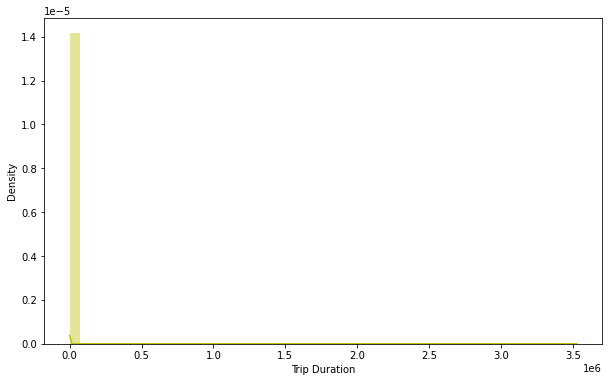

In [151]:
# Dependent variable is trip duration
plt.figure(figsize = (10,6))
sns.distplot(taxi_df['trip_duration'], color='y')
plt.xlabel('Trip Duration')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


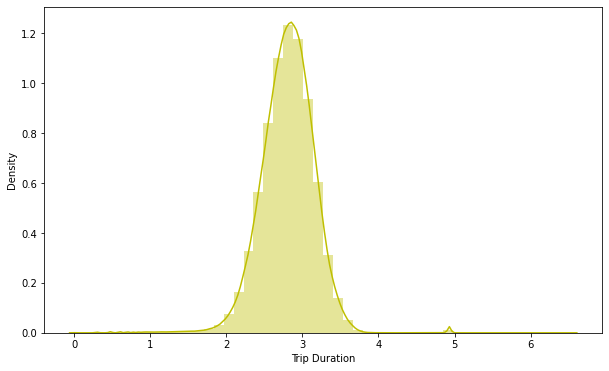

In [152]:
#Performing np.log10 transformation since the above graph is right skewed
plt.figure(figsize = (10,6))
sns.distplot(np.log10(taxi_df['trip_duration']), color='y')
plt.xlabel('Trip Duration')
plt.show()

Now the graph has normal distribution

In [153]:
# To display all values
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


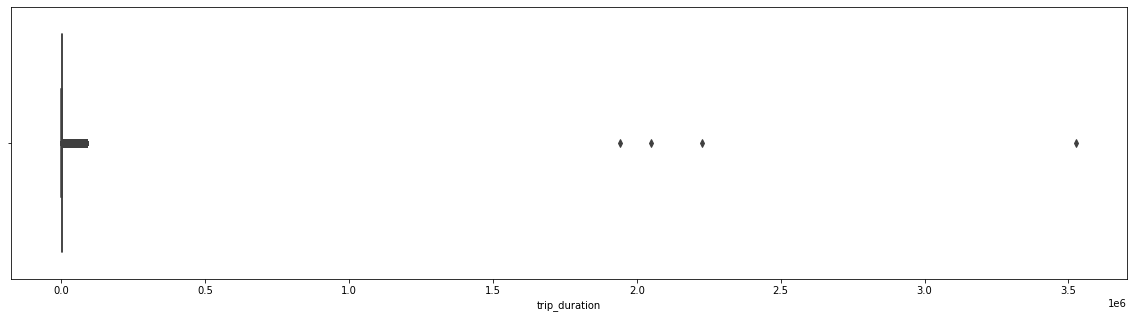

In [154]:
# Box plot of trip_duration
plt.figure(figsize = (20,5))
sns.boxplot(taxi_df.trip_duration)
plt.show()

In [155]:
taxi_df['trip_duration'].sort_values(ascending=False).reset_index().head(100)

,index,trip_duration
0,978383,3526282
1,924150,2227612
2,680594,2049578
3,355003,1939736
4,1234291,86392
5,295382,86391
6,73816,86390
7,59891,86387
8,1360439,86385
9,753765,86379


### Here there are trips with more than 24hrs duration which is 86400 seconds upto 40 days.

In [156]:
max(taxi_df.trip_duration)

3526282

In [157]:
trip_duration_df = pd.DataFrame(taxi_df.trip_duration.groupby(pd.cut(taxi_df.trip_duration, np.arange(1,max(taxi_df.trip_duration),3600))).count())
trip_duration_df.columns = ['Count']
trip_duration_df = trip_duration_df.reset_index()
trip_duration_df.columns = ['Duration_by_hour', 'Count']
trip_duration_df.head()

,Duration_by_hour,Count
0,"(1, 3601]",1446313
1,"(3601, 7201]",10045
2,"(7201, 10801]",141
3,"(10801, 14401]",35
4,"(14401, 18001]",5


In [158]:
trip_duration_df

,Duration_by_hour,Count
0,"(1, 3601]",1446313
1,"(3601, 7201]",10045
2,"(7201, 10801]",141
3,"(10801, 14401]",35
4,"(14401, 18001]",5
5,"(18001, 21601]",11
6,"(21601, 25201]",11
7,"(25201, 28801]",13
8,"(28801, 32401]",17
9,"(32401, 36001]",8


### Checking for trips taken within 0-30 mins.

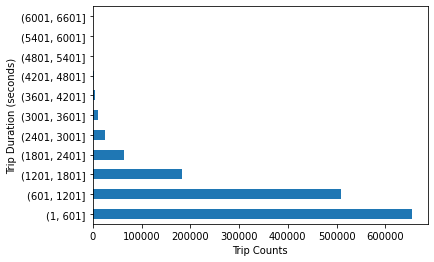

In [159]:
# Plot to compare time_duration with Trip counts
taxi_df.trip_duration.groupby(pd.cut(taxi_df.trip_duration, np.arange(1,7200,600))).count().plot(kind='barh')
plt.xlabel('Trip Counts')
plt.ylabel('Trip Duration (seconds)')
plt.show()

### From the above observation we can see that most of the trip duration is completed almost within half an hour i.e, 26 mins(1600 seconds). Also there are very few trips that have duration more than 2000 seconds and some are as low as 1 second(0 km distance). We can remove trips between 0 and 60 secs and above 7,200 sec  for data consistency

In [160]:
# Now to remove outliers i.e, trips with duration more than 86402 seconds and less than 60 seconds
taxi_df = taxi_df[taxi_df.trip_duration <= 4500]
taxi_df = taxi_df[taxi_df.trip_duration >= 60]

In [161]:
taxi_df.shape

(1444689, 21)

### Vendor id

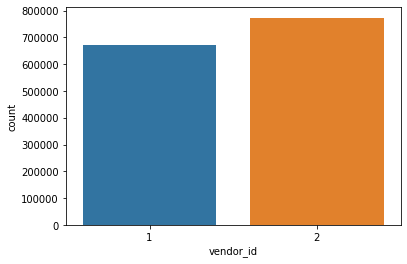

In [162]:
# Countplot for Vendor id
sns.countplot(x='vendor_id',data=taxi_df)

### There are a total 2 vendors and vendor 2 is slightly higher than vendor 1.

# Passenger variable

In [163]:
# Counting under passenger variable
taxi_df.passenger_count.value_counts()

1    1023285
2     208489
5      77425
3      59400
6      47923
4      28148
0         17
9          1
8          1
Name: passenger_count, dtype: int64

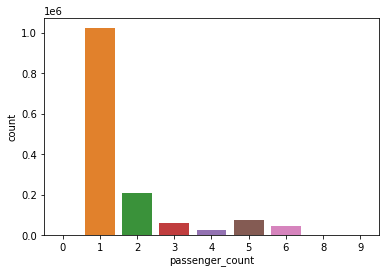

In [164]:
# Countplot for passenger variable
sns.countplot(x='passenger_count',data=taxi_df)

# As we can see there are 17 trips with 0 passengers. We need to remove it as it may be due to cancellation.
# As for passengers above 6, there is a cab called maxicab which carry upto 12 passengers, but since there are only 2 trips of above 6 passengers it doesn't make any difference. Therefore removing 0 and above 6 passenger seats.

In [165]:
# Selecting data having passengers from 1 to 6
taxi_df=taxi_df[taxi_df['passenger_count']!=0]
taxi_df=taxi_df[taxi_df['passenger_count']<=6]

In [166]:
taxi_df.passenger_count.value_counts()

1    1023285
2     208489
5      77425
3      59400
6      47923
4      28148
Name: passenger_count, dtype: int64

# Store and Forward Flag

In [167]:
taxi_df['store_and_fwd_flag'].value_counts()

N    1436851
Y       7819
Name: store_and_fwd_flag, dtype: int64

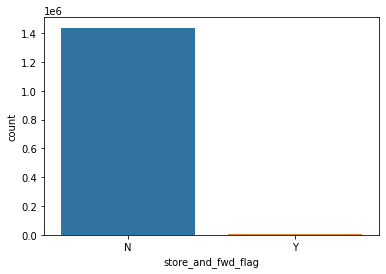

In [168]:
# Countplot for Store and Forward Flag
sns.countplot(x='store_and_fwd_flag',data=taxi_df)

# From Store and Forward Flag almost all the trip records were not connected to server.

# Distance count

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


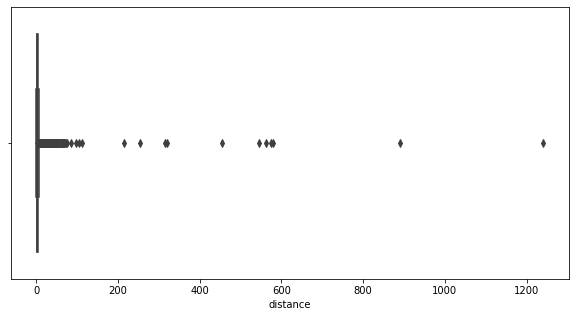

In [169]:
# Boxtplot for distance
plt.figure(figsize = (10,5))
sns.boxplot(taxi_df.distance)
plt.show()

Here we can see that there are distances as low as 0 and also more than 100 KM.

The trips having 0 distance might possibly be due to cancellation or there is no GPS for that location.Getting distances with 0 KM

In [170]:
print("The number of trips having 0 distance are {}".format(taxi_df.distance[taxi_df["distance"] == 0].count()))

The number of trips having 0 distance are 4213


### Trips per times of the day

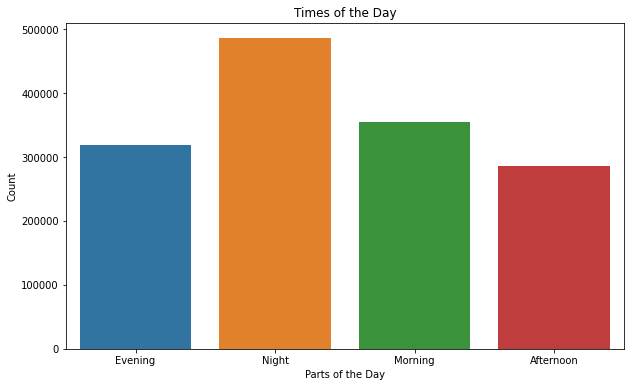

In [171]:
# Countplot for Times of the Day
plt.figure(figsize = (10,6))
sns.countplot(x="pickup_tod", data=taxi_df)
plt.title('Times of the Day')
plt.xlabel('Parts of the Day')
plt.ylabel('Count')
plt.show()

### As we can see night is the busiest and afternoon is least busy.

# Trips per Day

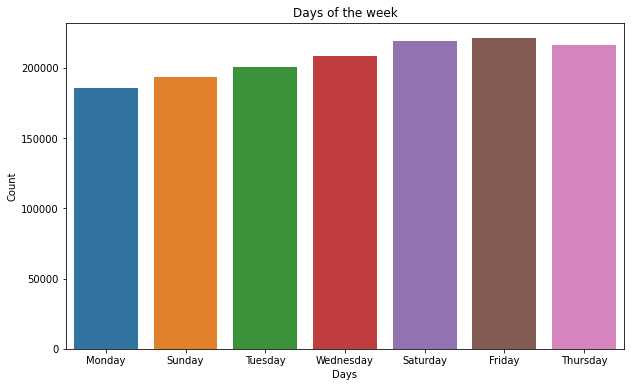

In [172]:
# Countplot plot per day
plt.figure(figsize = (10,6))
sns.countplot(x="picked_up_day", data=taxi_df)
plt.title('Days of the week')
plt.xlabel('Days')
plt.ylabel('Count')
plt.show()

### Weekends are the busiest and Monday is the least busiest.

# Trips per Hour

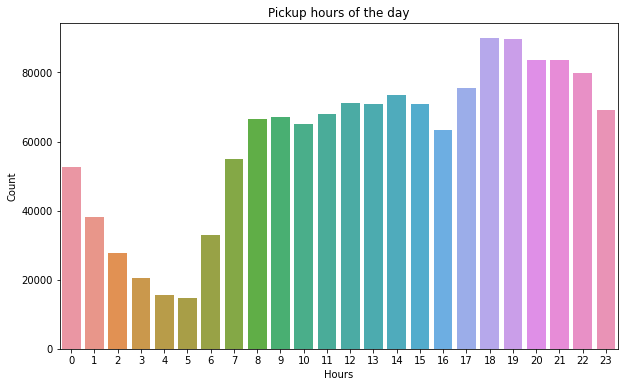

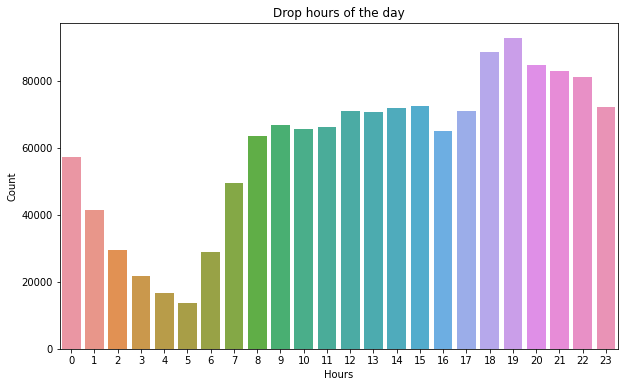

In [173]:
# Countplot for each hour
plt.figure(figsize = (10,6))
sns.countplot(x="picked_up_hour", data=taxi_df)
plt.title('Pickup hours of the day')
plt.xlabel('Hours')
plt.ylabel('Count')
plt.show()

plt.figure(figsize = (10,6))
sns.countplot(x="dropped_hour", data=taxi_df)
plt.title('Drop hours of the day')
plt.xlabel('Hours')
plt.ylabel('Count')
plt.show()

### Peak hours are from 6PM to 7PM. Probably they are returning from work.

# Trips per month

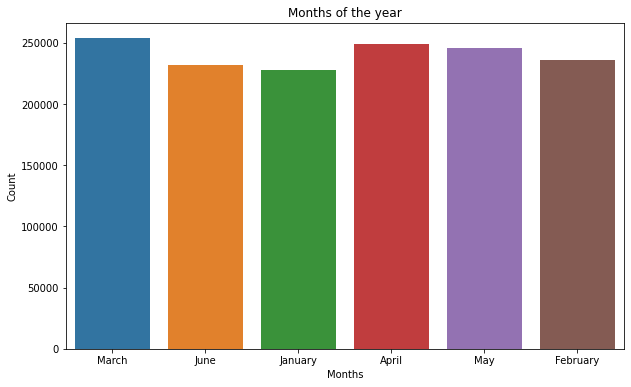

In [174]:
# Countplot per month
plt.figure(figsize = (10,6))
sns.countplot(x="month", data=taxi_df)
plt.title('Months of the year')
plt.xlabel('Months')
plt.ylabel('Count')
plt.show()

In [175]:
taxi_df['year'].value_counts()

2016    1444670
Name: year, dtype: int64

### This looks like half-a-year worth of data. March seems to be significant but still there is not much difference

# Speed

In NYC the maximum speed limit is 40 km/hr in urban areas and on highways it's 104 km/hr.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


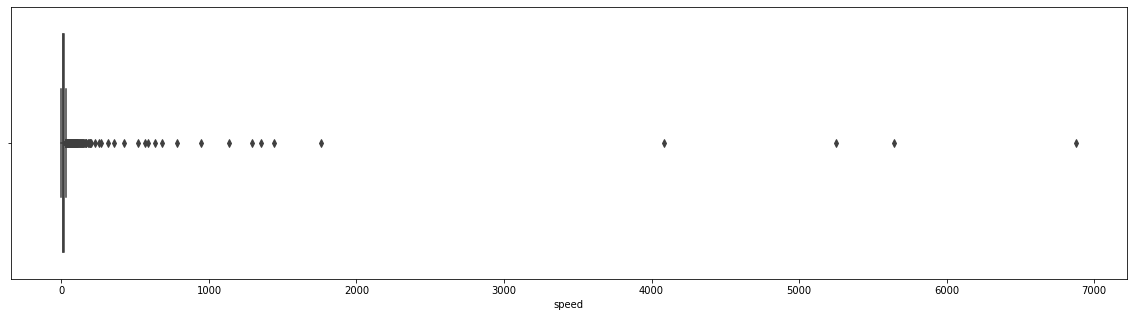

In [176]:
# Box plot for speed to check outliers
plt.figure(figsize = (20,5))
sns.boxplot(taxi_df.speed)
plt.show()

### Removing trips with speeds of over 200 km/hr for data consistency.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


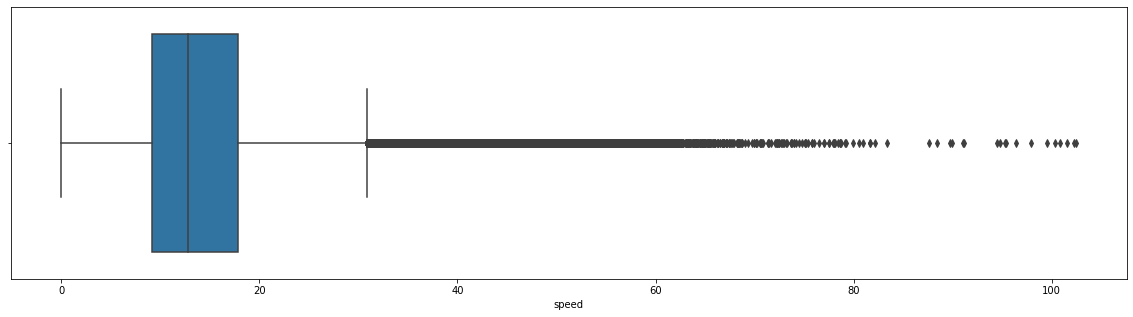

In [177]:
taxi_df = taxi_df[taxi_df['speed'] <= 104] # Selecting data where speed is less than or equal to 104 km/hr
plt.figure(figsize = (20,5))
sns.boxplot(taxi_df.speed) # Again box plot for speed variable
plt.show()

### Most of the trips are done under 0-20 km/hr and above 30 km/hr are all outliers but still they are under the 104 km/hr which is the maximum speed limit. 

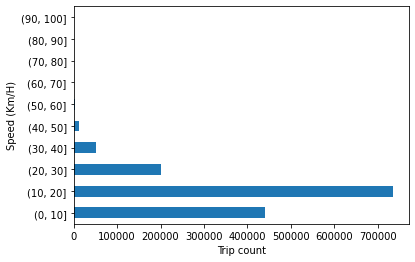

In [178]:
taxi_df.speed.groupby(pd.cut(taxi_df.speed, np.arange(0,104,10))).count().plot(kind = 'barh') # Grouping speed in groups of 10
plt.xlabel('Trip count')
plt.ylabel('Speed (Km/H)')
plt.show()

### In the above graph most of the trips are with 10-20 km/hr range as mentioned earlier.

# Bivariate Analysis

### Trip Duration per hour

Text(0.5, 1.0, 'Dropoff_hour vs Count')

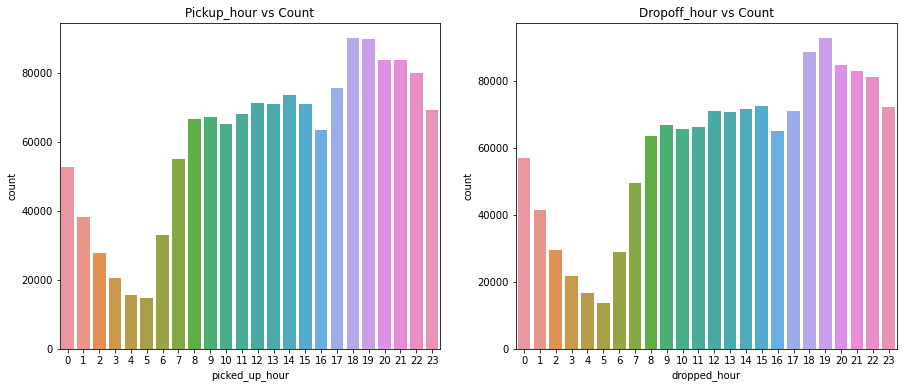

In [179]:
# Line plot for picked_up_hour, trip duration
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.countplot(x= "picked_up_hour", data=taxi_df)
fig.set_title("Pickup_hour vs Count")
    
plt.subplot(1, 2, 2)
fig = sns.countplot(x= "dropped_hour", data= taxi_df)
fig.set_title("Dropoff_hour vs Count")

The duration is maximum at 3PM and lowest at 6AM.

## Trip duration per weekday

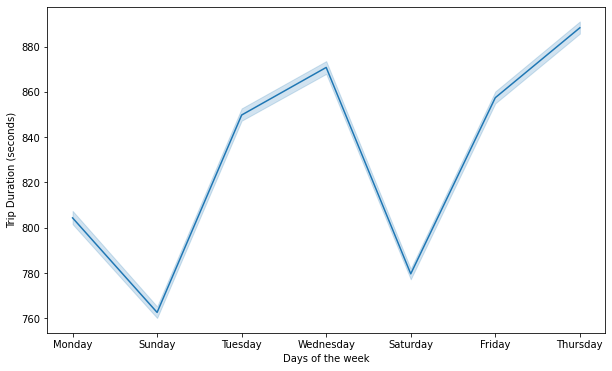

In [180]:
# Line plot for picked_up_day, trip duration
plt.figure(figsize = (10,6))
sns.lineplot(x='picked_up_day',y='trip_duration',data=taxi_df)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Days of the week')
plt.show()

On thursdays the duration in maximum and on mondays the duration is minimum.

## Trip duration per month

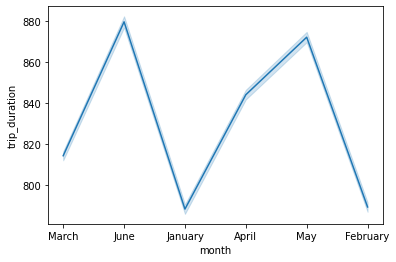

In [181]:
# Line plot for analyzing month and trip duration
sns.lineplot(x="month", y='trip_duration', data=taxi_df)

### The trips duration is highest during march, april and may due to summer holidays.

## Trip Duration per Store and Forward Flag

<Figure size 720x432 with 0 Axes>

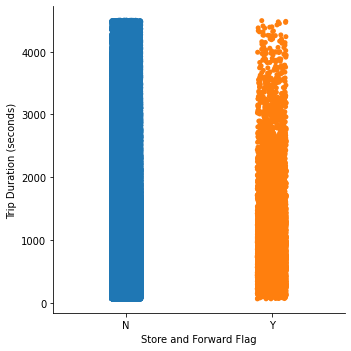

In [182]:
# Strip plot for analyzing Trip Duration per Store and Forward Flag
plt.figure(figsize = (10,6))
sns.catplot(y='trip_duration',x='store_and_fwd_flag',data=taxi_df,kind='strip')
plt.xlabel('Store and Forward Flag')
plt.ylabel('Trip Duration (seconds)')
plt.show()

## Trip Duration per Vendor

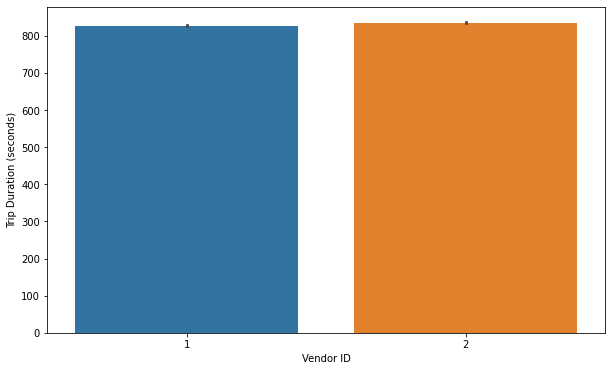

In [183]:
# Bar plot for analyzing trip duration per vendor
plt.figure(figsize = (10,6))
sns.barplot(y='trip_duration',x='vendor_id',data=taxi_df,estimator=np.mean)
plt.xlabel('Vendor ID')
plt.ylabel('Trip Duration (seconds)')
plt.show()

### From this we can see that vendor 2 provides more long trips than vendor 1. Still not significant enough.

## One Hot Encoding

In [184]:
# Categorical variables to be dummified
cat_var = ['pickup_tod','store_and_fwd_flag','month','picked_up_day']

In [185]:
# Creating dummies for times of the day variable
for col in cat_var:
  dummy = pd.get_dummies(taxi_df[col], prefix=col)
  taxi_df = pd.concat([taxi_df,dummy], axis = 1)

In [186]:
taxi_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,picked_up_hour,dropped_hour,pickup_tod,drop_tod,picked_up_day,dropped_day,month,year,distance,speed,pickup_tod_Afternoon,pickup_tod_Evening,pickup_tod_Morning,pickup_tod_Night,store_and_fwd_flag_N,store_and_fwd_flag_Y,month_April,month_February,month_January,month_June,month_March,month_May,picked_up_day_Friday,picked_up_day_Monday,picked_up_day_Saturday,picked_up_day_Sunday,picked_up_day_Thursday,picked_up_day_Tuesday,picked_up_day_Wednesday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17,17,Evening,Evening,Monday,Monday,March,2016,1.498523,11.856445,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,0,Night,Night,Sunday,Sunday,June,2016,1.805510,9.803673,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11,12,Morning,Afternoon,Tuesday,Tuesday,January,2016,6.385108,10.822216,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19,19,Evening,Evening,Wednesday,Wednesday,April,2016,1.485501,12.465739,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13,13,Afternoon,Afternoon,Saturday,Saturday,March,2016,1.188590,9.836608,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [187]:
# Dropping unnecessary variables
taxi_df = taxi_df.drop(['id','pickup_datetime','dropoff_datetime','store_and_fwd_flag','pickup_tod','drop_tod','year','dropped_hour','month','picked_up_day','dropped_day'], axis=1)
taxi_df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,picked_up_hour,distance,speed,pickup_tod_Afternoon,pickup_tod_Evening,pickup_tod_Morning,pickup_tod_Night,store_and_fwd_flag_N,store_and_fwd_flag_Y,month_April,month_February,month_January,month_June,month_March,month_May,picked_up_day_Friday,picked_up_day_Monday,picked_up_day_Saturday,picked_up_day_Sunday,picked_up_day_Thursday,picked_up_day_Tuesday,picked_up_day_Wednesday
0,2,1,-73.982155,40.767937,-73.964630,40.765602,455,17,1.498523,11.856445,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,1,1,-73.980415,40.738564,-73.999481,40.731152,663,0,1.805510,9.803673,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,2,1,-73.979027,40.763939,-74.005333,40.710087,2124,11,6.385108,10.822216,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,2,1,-74.010040,40.719971,-74.012268,40.706718,429,19,1.485501,12.465739,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,2,1,-73.973053,40.793209,-73.972923,40.782520,435,13,1.188590,9.836608,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [188]:
# Shape of the data
taxi_df.shape

(1444624, 29)

In [189]:
# Information on Data
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1444624 entries, 0 to 1458643
Data columns (total 29 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   vendor_id                1444624 non-null  int64  
 1   passenger_count          1444624 non-null  int64  
 2   pickup_longitude         1444624 non-null  float64
 3   pickup_latitude          1444624 non-null  float64
 4   dropoff_longitude        1444624 non-null  float64
 5   dropoff_latitude         1444624 non-null  float64
 6   trip_duration            1444624 non-null  int64  
 7   picked_up_hour           1444624 non-null  int64  
 8   distance                 1444624 non-null  float64
 9   speed                    1444624 non-null  float64
 10  pickup_tod_Afternoon     1444624 non-null  uint8  
 11  pickup_tod_Evening       1444624 non-null  uint8  
 12  pickup_tod_Morning       1444624 non-null  uint8  
 13  pickup_tod_Night         1444624 non-null 

### All the variables are in numeric datatype, fit for regression and also there are no null values

In [190]:
# Checking for NULL values
taxi_df.isnull().sum()

vendor_id                  0
passenger_count            0
pickup_longitude           0
pickup_latitude            0
dropoff_longitude          0
dropoff_latitude           0
trip_duration              0
picked_up_hour             0
distance                   0
speed                      0
pickup_tod_Afternoon       0
pickup_tod_Evening         0
pickup_tod_Morning         0
pickup_tod_Night           0
store_and_fwd_flag_N       0
store_and_fwd_flag_Y       0
month_April                0
month_February             0
month_January              0
month_June                 0
month_March                0
month_May                  0
picked_up_day_Friday       0
picked_up_day_Monday       0
picked_up_day_Saturday     0
picked_up_day_Sunday       0
picked_up_day_Thursday     0
picked_up_day_Tuesday      0
picked_up_day_Wednesday    0
dtype: int64

In [191]:
# Getting all features
features= taxi_df.describe().columns.tolist()
features.remove('trip_duration') # Removing dependent variable
print(features)

['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'picked_up_hour', 'distance', 'speed', 'pickup_tod_Afternoon', 'pickup_tod_Evening', 'pickup_tod_Morning', 'pickup_tod_Night', 'store_and_fwd_flag_N', 'store_and_fwd_flag_Y', 'month_April', 'month_February', 'month_January', 'month_June', 'month_March', 'month_May', 'picked_up_day_Friday', 'picked_up_day_Monday', 'picked_up_day_Saturday', 'picked_up_day_Sunday', 'picked_up_day_Thursday', 'picked_up_day_Tuesday', 'picked_up_day_Wednesday']


### Train-Test Split for the above data inorder to fit the models

In [192]:
# Importing Z-score applying it to the features
from scipy.stats import zscore
X = taxi_df[features].apply(zscore)

In [193]:
y = np.log10(taxi_df['trip_duration'])

# Linear Regression

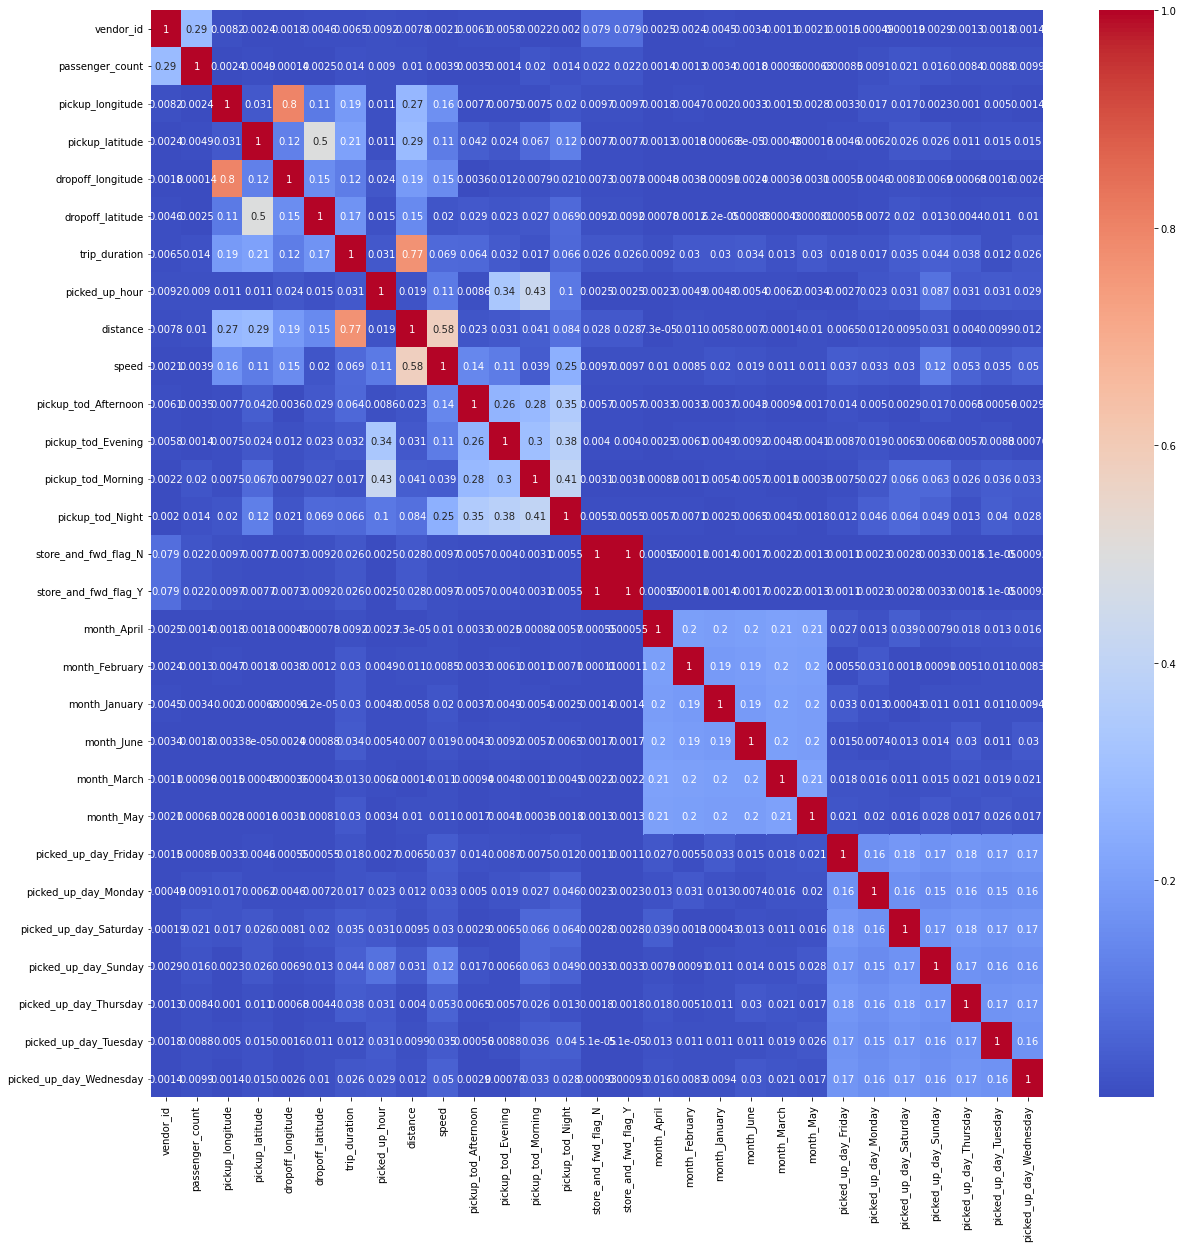

In [194]:
# Correalation analysis using heatmap
plt.figure (figsize= (20,20))
correlation= taxi_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [195]:
# Removing store_and_fwd_flag_Y variable since it low
taxi_df = taxi_df.drop(columns='store_and_fwd_flag_Y', axis=1)

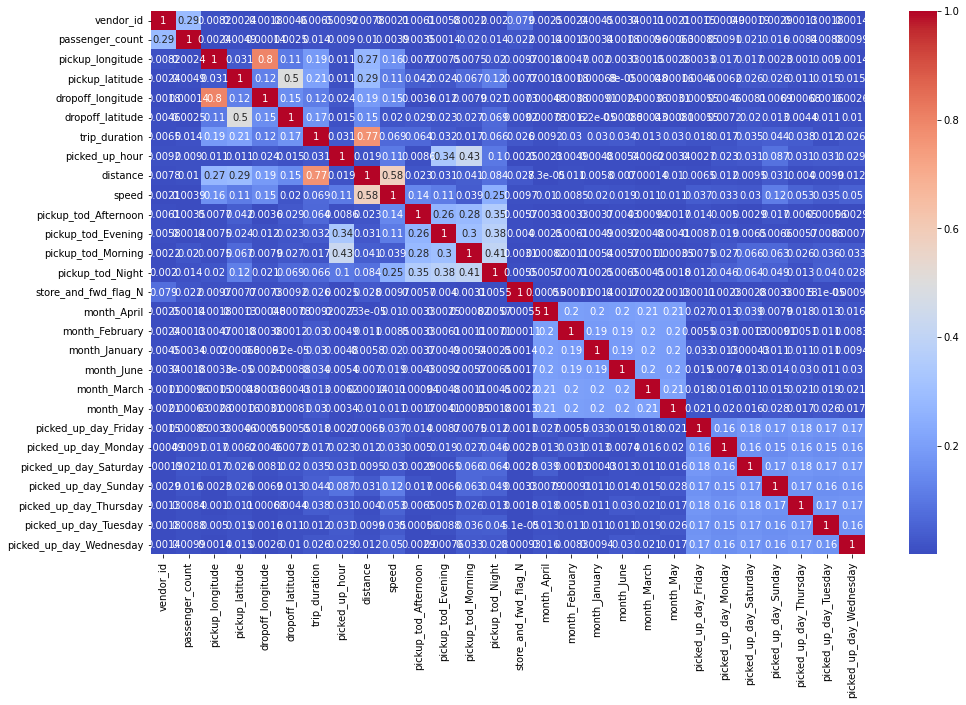

In [196]:
# Correlation analysis using heatmap
plt.figure (figsize= (16,10))
correlation= taxi_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [197]:
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(1155699, 28)
(288925, 28)


In [198]:
reg = LinearRegression().fit(X_train, y_train)

In [199]:
reg.score(X_train, y_train)

0.6740671092866466

In [200]:
reg.coef_

array([-5.10307861e-04,  9.57676398e-04, -3.65389003e-02,  1.93151038e-02,
        2.33218556e-02, -3.52615366e-03, -1.51850408e-03,  3.26415894e-01,
       -1.89884368e-01,  2.69896238e+11,  2.80666731e+11,  2.91298890e+11,
        3.19875550e+11,  2.72977511e+10,  2.72977511e+10,  4.75597485e+10,
        4.65638686e+10,  4.58685044e+10,  4.61912229e+10,  4.79079092e+10,
        4.72923350e+10,  5.92629011e+10,  5.50760138e+10,  5.90307007e+10,
        5.60534205e+10,  5.87188538e+10,  5.69460031e+10,  5.77965897e+10])

In [201]:
len(reg.coef_)

28

In [202]:
reg.intercept_

2.81148583649766

In [203]:
y_pred = reg.predict(X_test)

In [204]:
y_pred

array([2.90331323, 2.94551904, 2.74723108, ..., 3.24469812, 2.62941034,
       2.91971643])

In [205]:
from sklearn.metrics import mean_squared_error
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 0.03221279360572091
RMSE : 0.17947922889772205


In [206]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.6745278924166145
Adjusted R2 :  0.6744963474349868


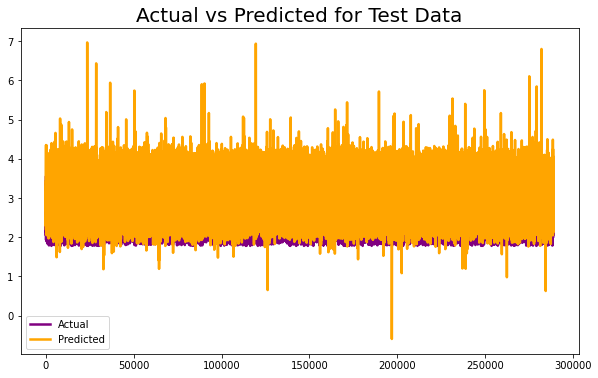

In [207]:
# Actual vs Prediction
plt.figure(figsize= (10,6))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='purple', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred, color='orange', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

# Lasso Regression

In [208]:
# Cross validation
from sklearn.model_selection import GridSearchCV
# Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=4)
lasso_regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.036e+02, tolerance: 8.558e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.445e+02, tolerance: 8.566e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [209]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-05}

Using  {'alpha': 1e-05}  the negative mean squared error is:  -0.0322777516512302


In [210]:
y_pred_lasso = lasso_regressor.predict(X_test)

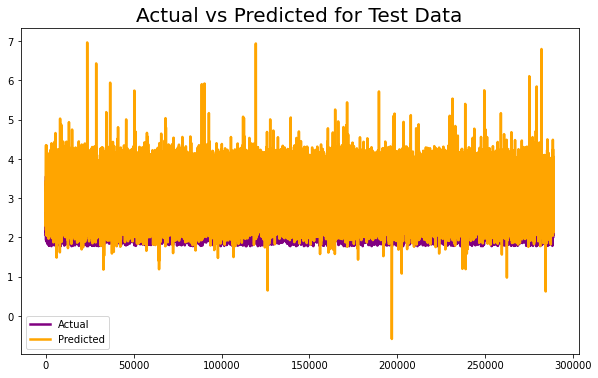

In [211]:
plt.figure(figsize= (10,6))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='purple', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_lasso, color='orange', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

In [212]:
MSE  = mean_squared_error(y_test,y_pred_lasso)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_lasso)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.03221263236778086
RMSE : 0.1794787797144299
R2 : 0.6745295215349334
Adjusted R2 :  0.6744979767112009


# Ridge Regression

In [213]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.32438e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.8223e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [214]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 100}

Using  {'alpha': 100}  the negative mean squared error is:  -0.03230159791072439


In [215]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [216]:
MSE  = mean_squared_error(y_test, y_pred_ridge)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_ridge)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.032212792002257386
RMSE : 0.1794792244307329
R2 : 0.6745279086177132
Adjusted R2 :  0.6744963636376556


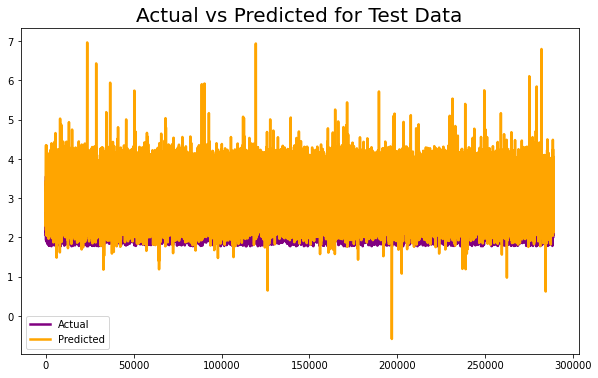

In [217]:
plt.figure(figsize= (10,6))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='purple', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_ridge, color='orange', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

# Decision Tree Regressor

In [218]:
from sklearn.tree import DecisionTreeRegressor

In [219]:
# Maximum depth of trees
max_depth = [4,6,8,10]
 
# Minimum number of samples required to split a node
min_samples_split = [10,20,30]
 
# Minimum number of samples required at each leaf node
min_samples_leaf = [8,16,22]
 
# Hyperparameter Grid
param_dict_dt = {
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}
#the cache variables contains the best parameters for the Decision Tree to save time when running again
cache = {
              'max_depth' : [10],
              'min_samples_split' : [10],
              'min_samples_leaf' : [22]}

In [220]:
dt = DecisionTreeRegressor()

# Grid search
dt_grid = GridSearchCV(estimator=dt,
                       param_grid = cache,
                       cv = 5, verbose=2, scoring='r2')

dt_grid.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=10, min_samples_leaf=22, min_samples_split=10; total time=  12.9s
[CV] END max_depth=10, min_samples_leaf=22, min_samples_split=10; total time=  12.7s
[CV] END max_depth=10, min_samples_leaf=22, min_samples_split=10; total time=  13.9s
[CV] END max_depth=10, min_samples_leaf=22, min_samples_split=10; total time=  12.7s
[CV] END max_depth=10, min_samples_leaf=22, min_samples_split=10; total time=  12.8s


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [10], 'min_samples_leaf': [22],
                         'min_samples_split': [10]},
             scoring='r2', verbose=2)

In [221]:
dt_grid.best_score_

0.989840805794261

In [222]:
dt_grid.best_estimator_

DecisionTreeRegressor(max_depth=10, min_samples_leaf=22, min_samples_split=10)

In [223]:
# Making prediction
y_pred_dt_train=dt_grid.predict(X_train)

y_pred_dt_test=dt_grid.predict(X_test)

In [224]:
# training metrics
dt_trn_mse  = mean_squared_error(y_train, y_pred_dt_train)
print("Train MSE :" , dt_trn_mse)

dt_trn_rmse = np.sqrt(dt_trn_mse)
print("Train RMSE :" ,dt_trn_rmse)

dt_trn_r2 = r2_score(y_train, y_pred_dt_train)
print("Train R2 :" ,dt_trn_r2)

dt_trn_r2_= 1-(1-r2_score(y_train, y_pred_dt_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ", dt_trn_r2_)

Train MSE : 0.0009805662976614961
Train RMSE : 0.03131399523633955
Train R2 : 0.9900780926721561
Train Adjusted R2 :  0.9900778522805173


In [225]:
# Testing metrics
dt_tst_mse  = mean_squared_error(y_test, y_pred_dt_test)
print("Test MSE :" , dt_tst_mse)
dt_tst_rmse = np.sqrt(dt_tst_mse)
print("Test RMSE :" ,dt_tst_rmse)

dt_tst_r2 = r2_score(y_test, y_pred_dt_test)
print("Test R2 :" ,dt_tst_r2)

dt_tst_r2_= 1-(1-r2_score(y_test, y_pred_dt_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ", dt_tst_r2_)


Test MSE : 0.001030033494865371
Test RMSE : 0.032094134898223554
Test R2 : 0.9895927321126295
Test Adjusted R2 :  0.9895917234330326


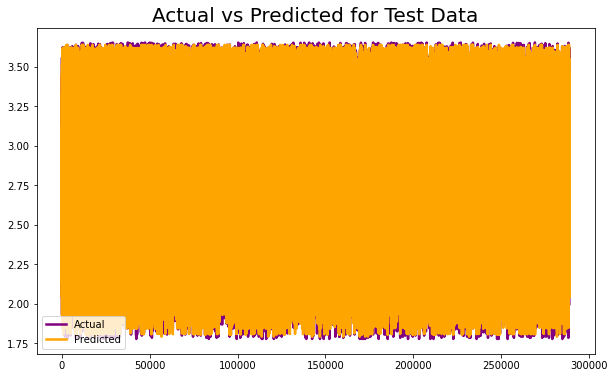

In [226]:
# Actual vs Prediction
plt.figure(figsize= (10,6))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='purple', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_dt_test, color='orange', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

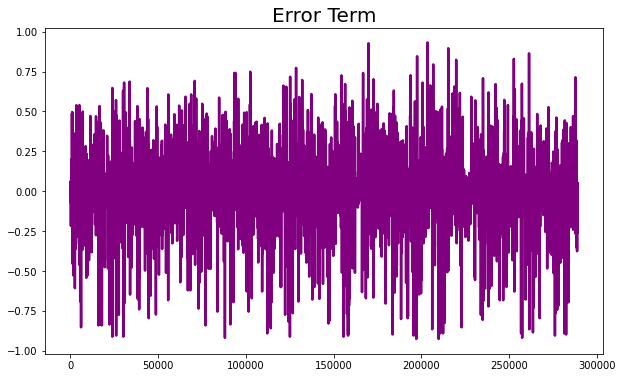

In [227]:

plt.figure(figsize= (10,6))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test-y_pred_dt_test, color='purple', linewidth=2.5, linestyle='-')
plt.title('Error Term', fontsize=20)
plt.show()

# XGBoost_Regressor

In [228]:
n_estimators = [80,150,200]
 
# Maximum depth of trees
max_depth = [5,8,10]
min_samples_split = [40,50]
learning_rate=[0.2,0.4,0.6]
 
# Hyperparameter Grid
param_xgb = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
             'min_samples_' : min_samples_split,
             'learning_rate' : learning_rate
             }
#the cache variables contains the best parameters for the XGBoost which we already tested before to save time when running it again.
cache = {'n_estimators' : [200],
              'max_depth' : [8],
             'min_samples_' : [40],
             'learning_rate' : [0.2],
             }

In [229]:
param_xgb

{'learning_rate': [0.2, 0.4, 0.6],
 'max_depth': [5, 8, 10],
 'min_samples_': [40, 50],
 'n_estimators': [80, 150, 200]}

In [230]:
# Importing XGbooster
import xgboost as xgb
xgb_model = xgb.XGBRegressor()

# Grid search
xgb_grid = GridSearchCV(estimator=xgb_model,
                        param_grid = cache,
                        cv = 3, verbose=1,
                        scoring="r2")

xgb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[14:43:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:52:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:01:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:09:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=3, estimator=XGBRegressor(),
             param_grid={'learning_rate': [0.2], 'max_depth': [8],
                         'min_samples_': [40], 'n_estimators': [200]},
             scoring='r2', verbose=1)

In [231]:
xgb_grid.best_score_

0.9959946399604359

In [232]:
xgb_grid.best_params_

{'learning_rate': 0.2, 'max_depth': 8, 'min_samples_': 40, 'n_estimators': 200}

In [233]:
# Making predictions
y_pred_xgb_train=xgb_grid.predict(X_train)
y_pred_xgb_test=xgb_grid.predict(X_test)

In [234]:
from sklearn.metrics import r2_score
# Training metrics
xgb_trn_mse  = mean_squared_error(y_train, y_pred_xgb_train)
print("Train MSE :" , xgb_trn_mse)

xgb_trn_rmse = np.sqrt(xgb_trn_mse)
print("Train RMSE :" ,xgb_trn_rmse)

xgb_trn_r2 = r2_score(y_train, y_pred_xgb_train)
print("Train R2 :" ,xgb_trn_r2)

xgb_trn_r2_= 1-(1-r2_score((y_train), (y_pred_xgb_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ", xgb_trn_r2_)

Train MSE : 0.00012301227914578153
Train RMSE : 0.011091090079238449
Train R2 : 0.9987552943265723
Train Adjusted R2 :  0.9987552641693831


In [235]:
# Testing metrics
xgb_tst_mse  = mean_squared_error(y_test, y_pred_xgb_test)
print("Test MSE :" , xgb_tst_mse)

xgb_tst_rmse = np.sqrt(xgb_tst_mse)
print("Test RMSE :" ,xgb_tst_rmse)

xgb_tst_r2 = r2_score(y_test, y_pred_xgb_test)
print("Test R2 :" ,xgb_tst_r2)

xgb_tst_r2_= 1-(1-r2_score((y_test), (y_pred_xgb_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ", xgb_tst_r2_)

Test MSE : 0.00043845496905295926
Test RMSE : 0.02093931634636048
Test R2 : 0.9955699321019854
Test Adjusted R2 :  0.9955695027367427


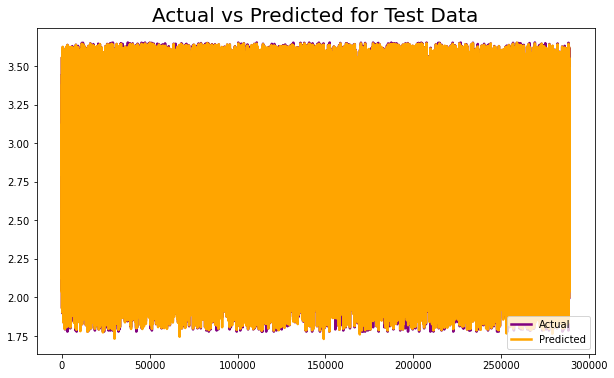

In [236]:
# Actual vs Prediction
plt.figure(figsize= (10,6))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='purple', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_xgb_test, color='orange', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

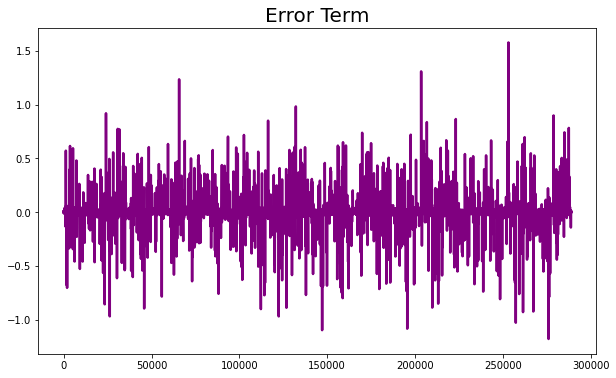

In [237]:
# Error term
plt.figure(figsize= (10,6))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test-y_pred_xgb_test, color='purple', linewidth=2.5, linestyle='-')
plt.title('Error Term', fontsize=20)
plt.show()